In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [7]:
from datetime import datetime as d

In [6]:
pd.DataFrame?

In [10]:
df = pd.DataFrame({
        'first_name': ['Aleksandra', 'Tomek', 'Konrad', 'Katarzyna', 'Jan', 'Tomek'],
        'last_name': ['Nowak', 'Kowalski', 'Lewandowski', 'Woźniak', 'Wiśniewski', 'Błaszczykowski'],
        'gender': ['female', 'male', 'male', 'female', 'male', 'male'],
        'date_of_birth': [d(1988, 1, 10), d(1938, 10, 22), d(1986, 11, 20), 
                          d(1980, 2, 12), d(1978, 5, 21), d(1960, 3, 1)],
        'rate': [100, 90, 50, 110, 170, 40],
        'hours': [60, 20, 100, 50, 160, 70],
    },
    columns=('first_name', 'last_name', 'gender', 'date_of_birth', 'rate', 'hours'),
)

In [11]:
df

,first_name,last_name,gender,date_of_birth,rate,hours
0,Aleksandra,Nowak,female,1988-01-10,100,60
1,Tomek,Kowalski,male,1938-10-22,90,20
2,Konrad,Lewandowski,male,1986-11-20,50,100
3,Katarzyna,Woźniak,female,1980-02-12,110,50
4,Jan,Wiśniewski,male,1978-05-21,170,160
5,Tomek,Błaszczykowski,male,1960-03-01,40,70


In [12]:
df.rate

0    100
1     90
2     50
3    110
4    170
5     40
Name: rate, dtype: int64

In [13]:
df[df.gender == 'male']

,first_name,last_name,gender,date_of_birth,rate,hours
1,Tomek,Kowalski,male,1938-10-22,90,20
2,Konrad,Lewandowski,male,1986-11-20,50,100
4,Jan,Wiśniewski,male,1978-05-21,170,160
5,Tomek,Błaszczykowski,male,1960-03-01,40,70


In [14]:
df[df.first_name == 'Jan']

,first_name,last_name,gender,date_of_birth,rate,hours
4,Jan,Wiśniewski,male,1978-05-21,170,160


In [21]:
df[(df.gender == 'male') & (df.date_of_birth.dt.year > 1960)]

,first_name,last_name,gender,date_of_birth,rate,hours
2,Konrad,Lewandowski,male,1986-11-20,50,100
4,Jan,Wiśniewski,male,1978-05-21,170,160


In [23]:
df['rate_per_hour'] = round(df.rate / df.hours, 2)
df

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour
0,Aleksandra,Nowak,female,1988-01-10,100,60,1.67
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50
2,Konrad,Lewandowski,male,1986-11-20,50,100,0.50
3,Katarzyna,Woźniak,female,1980-02-12,110,50,2.20
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57


In [24]:
df.sort_values('date_of_birth')

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06
3,Katarzyna,Woźniak,female,1980-02-12,110,50,2.20
2,Konrad,Lewandowski,male,1986-11-20,50,100,0.50
0,Aleksandra,Nowak,female,1988-01-10,100,60,1.67


In [25]:
df.sort_values('date_of_birth', ascending=False)

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour
0,Aleksandra,Nowak,female,1988-01-10,100,60,1.67
2,Konrad,Lewandowski,male,1986-11-20,50,100,0.50
3,Katarzyna,Woźniak,female,1980-02-12,110,50,2.20
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50


In [31]:
df['age'] = ((d.today() - df.date_of_birth).dt.days / 365).astype(int)
df

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour,age
0,Aleksandra,Nowak,female,1988-01-10,100,60,1.67,32
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50,81
2,Konrad,Lewandowski,male,1986-11-20,50,100,0.50,33
3,Katarzyna,Woźniak,female,1980-02-12,110,50,2.20,39
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06,41
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57,59


In [35]:
df.groupby('rate_per_hour').aggregate({'rate_per_hour': 'count', 'age': 'mean'})

,rate_per_hour,age
rate_per_hour,,
0.50,1,33
0.57,1,59
1.06,1,41
1.67,1,32
2.20,1,39
4.50,1,81


In [38]:
age_per_rate = df.groupby('rate_per_hour').aggregate({'age': 'mean'})
age_per_rate

,age
rate_per_hour,
0.50,33
0.57,59
1.06,41
1.67,32
2.20,39
4.50,81


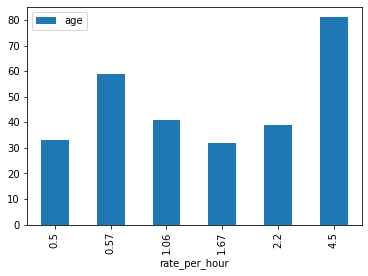

In [39]:
age_per_rate.plot(kind='bar')

In [40]:
def czy_wiek_emerytalny(wiek):
    return wiek > 65

In [41]:
df.age.apply(czy_wiek_emerytalny)

0    False
1     True
2    False
3    False
4    False
5    False
Name: age, dtype: bool

In [42]:
df['pentionist'] = df.age.apply(czy_wiek_emerytalny)
df

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour,age,pentionist
0,Aleksandra,Nowak,female,1988-01-10,100,60,1.67,32,False
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50,81,True
2,Konrad,Lewandowski,male,1986-11-20,50,100,0.50,33,False
3,Katarzyna,Woźniak,female,1980-02-12,110,50,2.20,39,False
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06,41,False
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57,59,False


In [44]:
df[df.first_name.isin(['Jan', 'Tomek'])]

,first_name,last_name,gender,date_of_birth,rate,hours,rate_per_hour,age,pentionist
1,Tomek,Kowalski,male,1938-10-22,90,20,4.50,81,True
4,Jan,Wiśniewski,male,1978-05-21,170,160,1.06,41,False
5,Tomek,Błaszczykowski,male,1960-03-01,40,70,0.57,59,False
